<a href="https://colab.research.google.com/github/bankadilasha11/MACHINE-LEARNING/blob/master/logistic_regression_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#import titanic dataset
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


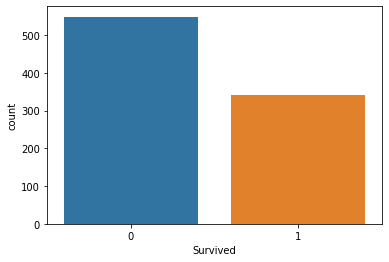

In [63]:
#count number of passenger who survived and Not survived : 0 = not survived,1 = survived
sns.countplot(x='Survived',data=titanic)
plt.show()

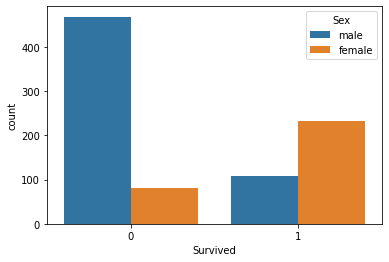

In [64]:
#count number of males and females who survived and Not survived : 0 = not survived,1 = survived
sns.countplot(x='Survived',hue='Sex',data=titanic)
plt.show()

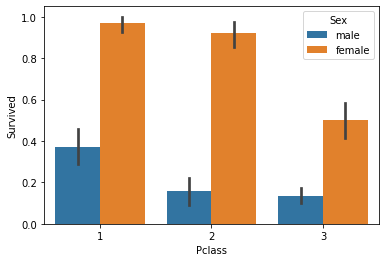

In [65]:
#count number of passenger class who survived the most
sns.barplot(x='Pclass',y='Survived',hue="Sex",data=titanic)
plt.show()

In [66]:
#verify missing values  in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
#check data types of each column and hence finding out which columns are categorical in nature
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
# function to impute missing values in age columns based on class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 10
        elif Pclass == 2:
            return 20
        else:
            return 24
    else:
        return Age

In [69]:
# impute missing values in age clumn by average age
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [70]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
# drop cabin column
titanic.drop('Cabin',inplace=True,axis=1)

In [72]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [73]:
#inpute Enbarked missing values with most common values
most_common_value = 'S'

titanic['Embarked'] = titanic['Embarked'].fillna(most_common_value)

In [74]:
#check if there are any missing values left:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [75]:
titanic['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [76]:
titanic['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [77]:
titanic['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

# always drop the first column after performing One Hot Encoding?

since one of the column can be generated completely frrom the others, and hence relating this extra columns does not add any new information for the modelling process, would it be good practice to always drop the first column after performing One Hot Encoding regardless of the algorithms of choice.

In [78]:
#convert categorical variables into dummy variables
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
pclass = pd.get_dummies(titanic['Pclass'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [79]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [80]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [81]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [82]:
# drop irrelevant columns
titanic.drop(['Sex','Embarked','Name','Ticket','Pclass','Age'],axis=1,inplace= True)

In [83]:
#validate the column and data
titanic.head()

,PassengerId,Survived,SibSp,Parch,Fare
0,1,0,1,0,7.2500
1,2,1,1,0,71.2833
2,3,1,0,0,7.9250
3,4,1,1,0,53.1000
4,5,0,0,0,8.0500


In [84]:
#concatenate the dummy variables, create above
titanic = pd.concat([titanic,sex,embark,pclass],axis=1)
titanic.head()

,PassengerId,Survived,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,1,0,7.2500,1,0,1,0,1
1,2,1,1,0,71.2833,0,0,0,0,0
2,3,1,0,0,7.9250,0,0,1,0,1
3,4,1,1,0,53.1000,0,0,1,0,0
4,5,0,0,0,8.0500,1,0,1,0,1


In [87]:
#create feature variables X and Target variable y
x= titanic.drop('Survived',axis=1)
y= titanic['Survived']

In [88]:
x.head()

,PassengerId,SibSp,Parch,Fare,male,Q,S,2,3
0,1,1,0,7.2500,1,0,1,0,1
1,2,1,0,71.2833,0,0,0,0,0
2,3,0,0,7.9250,0,0,1,0,1
3,4,1,0,53.1000,0,0,1,0,0
4,5,0,0,8.0500,1,0,1,0,1


In [89]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [90]:
#split the data into training set (70% )and test set(30%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30,random_state = 10)

In [91]:
# fit the logistic regression model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=100,random_state=90)
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=90, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
#predict the value for new, unseen data
y_pred = logmodel.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1])

In [93]:
print('wrong prediction out of total:')
print((y_test!=y_pred).sum(),'/',((y_test==y_pred).sum()+(y_test!=y_pred).sum()))

wrong prediction out of total:
3 / 30


In [94]:
from sklearn.metrics import accuracy_score
print('Percentage Accuracy:',100*accuracy_score(y_test,y_pred))

Percentage Accuracy: 90.0


In [95]:
#confusion matrics
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test,y_pred)
c_m

array([[21,  1],
       [ 2,  6]])

In [96]:
#how to find out missclassified samples

In [97]:
import numpy as np
np.where(y_pred!=y_test)

(array([ 8, 18, 27]),)